In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("nba2k20-full.csv")
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State


In [3]:
df.isna().sum()

full_name       0
rating          0
jersey          0
team           23
position        0
b_day           0
height          0
weight          0
salary          0
country         0
draft_year      0
draft_round     0
draft_peak      0
college        66
dtype: int64

In [4]:
df.team.fillna("none", inplace=True)
df.college.fillna("none", inplace=True)

In [5]:
def get_weight(series: pd.Series) -> pd.Series:
    return series.str.extract(r'(\d+) lbs\. / (\d+(\.\d+|)) kg\.')[1].apply(float)

def get_height(series: pd.Series) -> pd.Series:
    return series.str.extract(r'((\d+)-(\d+)) / (\d+(\.\d+|))')[3].apply(float)

df = df.assign(weight_kg=df.weight.pipe(get_weight)) \
        .assign(height_m=df.height.pipe(get_height))
df = df.assign(bmi=df.weight_kg / df.height_m.pow(2))
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,weight_kg,height_m,bmi
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,none,113.4,2.06,26.722594
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,102.1,2.01,25.271652
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,none,109.8,2.11,24.662519
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,104.3,2.08,24.107803
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,99.8,1.96,25.978759


In [6]:
df.salary = df.salary.str.slice(1).apply(int)
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,weight_kg,height_m,bmi
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,37436858,USA,2003,1,1,none,113.4,2.06,26.722594
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,32742000,USA,2011,1,15,San Diego State,102.1,2.01,25.271652
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,25842697,Greece,2013,1,15,none,109.8,2.11,24.662519
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,37199000,USA,2007,1,2,Texas,104.3,2.08,24.107803
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,38199000,USA,2009,1,3,Arizona State,99.8,1.96,25.978759


<AxesSubplot:xlabel='draft_year', ylabel='Count'>

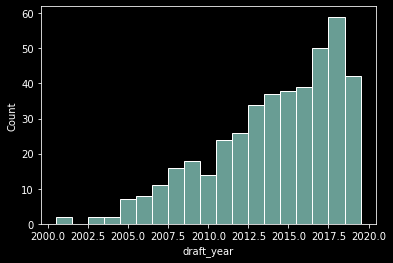

In [7]:
sns.histplot(data=df, x="draft_year", discrete=True)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

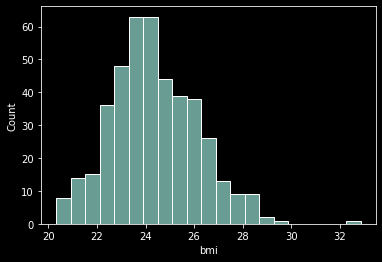

In [8]:
sns.histplot(data=df, x="bmi")

<AxesSubplot:xlabel='draft_year', ylabel='rating'>

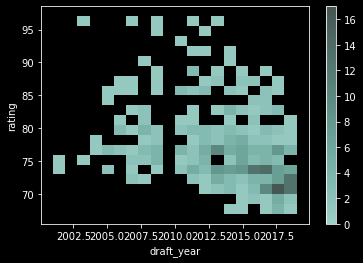

In [9]:
sns.histplot(data=df, x="draft_year", y="rating", bins=20, cbar=True)

<AxesSubplot:xlabel='rating', ylabel='salary'>

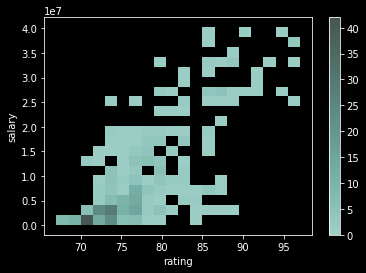

In [10]:
sns.histplot(data=df, x="rating", y="salary", cbar=True, bins=20)

<AxesSubplot:xlabel='rating', ylabel='salary'>

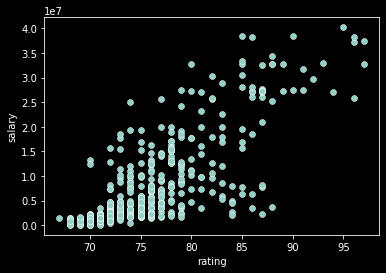

In [11]:
sns.scatterplot(data=df, x="rating", y="salary")

<AxesSubplot:xlabel='position', ylabel='salary'>

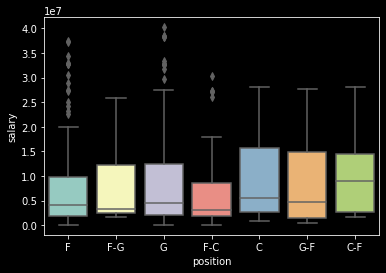

In [12]:
sns.boxplot(data=df, x="position", y="salary")

<AxesSubplot:xlabel='position', ylabel='Count'>

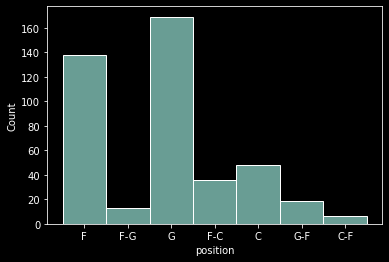

In [13]:
sns.histplot(data=df, x="position")

In [14]:
df[df.salary > 3 * 1e7].position

0       F
1       F
3       F
4       G
5       G
7       F
10      G
12      G
13      G
15      G
17      F
19      G
23      G
38      G
43      F
46      G
47      F
48      G
68    F-C
83      F
Name: position, dtype: object

In [15]:
df.to_csv("added.csv")